In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from matplotlib import cm

### Total enzyme and substrates (over the spatial grid) dynamics (cellulose)

In [3]:
Cellulose = pd.read_csv('Cellulose.csv')
Cellulose.columns = ['Day','Cellulose']
Cellulose_Enzyme = pd.read_csv('Cellulose_Enzyme.csv',index_col = 0)
Cellulose_Enzyme.columns = ['Enzyme']

Microbe = pd.read_csv('Microbe.csv')['C'].rename('Microbe')

Cellulose_Total = pd.concat([Cellulose,Cellulose_Enzyme,Microbe],axis = 1)
Cellulose_Total['Cellulose'] = Cellulose_Total.copy()['Cellulose']/10000
Cellulose_Total['Enzyme']    = Cellulose_Total.copy()['Enzyme']/10000

Cellulose_Total.head()

,Day,Cellulose,Enzyme,Microbe
0,1.0,147.292400,NaN,0.010900
1,2.0,147.292311,0.000000,0.010488
2,3.0,147.292139,0.000006,0.010136
3,4.0,147.291889,0.000011,0.009836
4,5.0,147.291566,0.000017,0.009492


In [4]:
Cellulose_Total.tail()

,Day,Cellulose,Enzyme,Microbe
296,297.0,0.000594,0.077154,1.429512
297,298.0,0.000581,0.074986,1.383989
298,299.0,0.000569,0.072874,1.339893
299,300.0,0.000558,0.070819,1.297212
300,NaN,NaN,0.068819,1.255482


In [5]:
# Replace the NAs with 0
#Cellulose_Total = Cellulose_Total.fillna(0)
#Cellulose_Total.head()

### Get the max ratios of biomass/substrate & enzyme/biomass

In [6]:
(Cellulose_Total['Microbe']/Cellulose_Total['Cellulose']).idxmax(skipna=True)

281

In [7]:
(Cellulose_Total['Microbe']/Cellulose_Total['Cellulose']).max(skipna=True)

2631.7330357779083

In [8]:
(Cellulose_Total['Enzyme']/Cellulose_Total['Microbe']).max(skipna=True)

0.0548146186927067

In [9]:
(Cellulose_Total['Enzyme']/Cellulose_Total['Microbe']).idxmax(skipna=True)

300

### Visualization

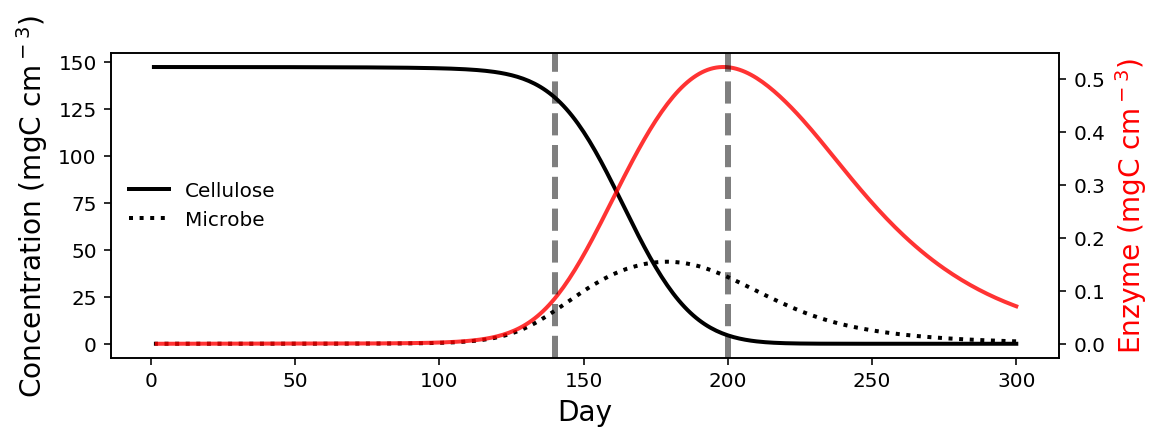

In [10]:
fig, ax1 = plt.subplots(figsize=(8.5,2.8))

ax2 = ax1.twinx()
ax1.plot(Cellulose_Total['Day'], Cellulose_Total['Cellulose'], 'k',linewidth=2)
ax1.plot(Cellulose_Total['Day'], Cellulose_Total['Microbe'],'k',linewidth=2,linestyle=':')

ax2.plot(Cellulose_Total['Day'], Cellulose_Total['Enzyme'], 'red',linewidth=2,alpha = 0.8)

ax1.legend(frameon=False,loc=6,fontsize=10)

ax1.set_xlabel('Day',size=14,weight = 'normal')
ax1.set_ylabel("Concentration (mgC cm$^-$$^3$)",size=14,weight='normal', color='k')
ax2.set_ylabel("Enzyme (mgC cm$^-$$^3$)",size=14,weight='normal', color='red')

plt.axvline(x=140,color = 'k',linewidth = 3,linestyle = '--',alpha = 0.5)
plt.axvline(x=200,color = 'k',linewidth = 3,linestyle = '--',alpha = 0.5)


#plt.savefig('Total_Cellulose_Enzyme_Dynamics.pdf',bbox_inches='tight')

# Day = 140

## substrate

In [6]:
Subindex = 2 # index only the cellulose data

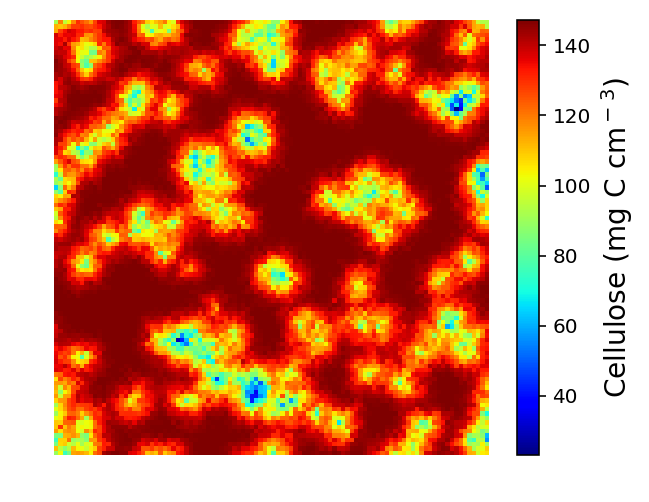

In [7]:
Substrate = pd.read_csv('Substrate_140.csv',index_col = 0)

Substrate_Grid = np.zeros((10000,3))
for i in np.arange(1,10001,1):
      Substrate_Grid[i-1] = Substrate.iloc[(Subindex + 12*(i-1)),]
        
index = ['C','N','P']   
df = pd.DataFrame(Substrate_Grid)
df.columns = index

Substrate_c = df['C']
Substrate_c_grid = Substrate_c.copy().values.reshape(100,100)

plt.figure(figsize=(5, 4))#, facecolor='w', edgecolor='k')
plt.grid(linestyle='')


xx = plt.imshow(Substrate_c_grid,cmap='jet')
plt.axis('off')

cbar = plt.colorbar(xx,orientation='vertical')
cbar.set_label('Cellulose (mg C cm$^-$$^3$)',size=14)


#plt.savefig('Substrate_Distribution_140.pdf',bbox_inches='tight')

## enzyme

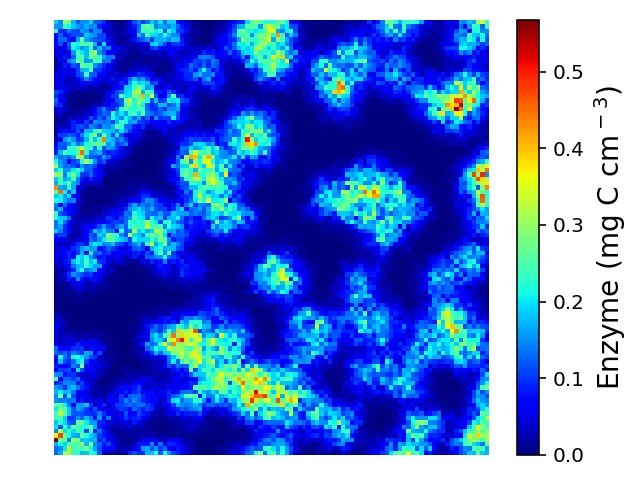

In [8]:
Enzyme = pd.read_csv('Enzyme_140.csv',index_col = 0)

Enzyme_Grid = np.zeros((10000,1))
for i in np.arange(1,10001,1):
    #Enzyme_Grid[i-1] = Enzyme.iloc[(0+12*(i-1)):(12+12*(i-1)),].sum()
    Enzyme_Grid[i-1]  = Enzyme.iloc[(Subindex + 12*(i-1)),]
        
        
df = pd.DataFrame(Enzyme_Grid)
df.columns = ['C']

Enzyme_c = df['C']
Enzyme_c_grid = Enzyme_c.copy().values.reshape(100,100)


plt.figure(figsize=(5, 4))

xx = plt.imshow(Enzyme_c_grid,cmap='jet')
plt.axis('off')


cbar = plt.colorbar(xx,orientation='vertical')
cbar.set_label('Enzyme (mg C cm$^-$$^3$)',size=14)

#plt.savefig('Enzyme_Distribution_140.pdf',bbox_inches='tight')

# Day = 200

## substrate

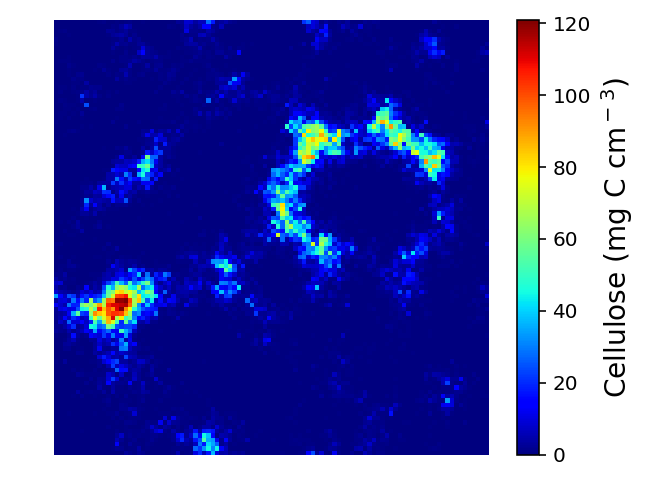

In [9]:
Substrate = pd.read_csv('Substrate_200.csv',index_col = 0)

Substrate_Grid = np.zeros((10000,3))
for i in np.arange(1,10001,1):
      Substrate_Grid[i-1] = Substrate.iloc[(Subindex + 12*(i-1)),]
        
index = ['C','N','P']   
df = pd.DataFrame(Substrate_Grid)
df.columns = index

Substrate_c = df['C']
Substrate_c_grid = Substrate_c.copy().values.reshape(100,100)

plt.figure(figsize=(5, 4))
plt.grid(linestyle='')

xx = plt.imshow(Substrate_c_grid,cmap='jet')
plt.axis('off')

cbar = plt.colorbar(xx,orientation='vertical',ticks=[0,20,40,60,80,100,120])
cbar.set_label('Cellulose (mg C cm$^-$$^3$)',size=14)

#plt.savefig('Substrate_Distribution_200.pdf',bbox_inches='tight')

## enzyme

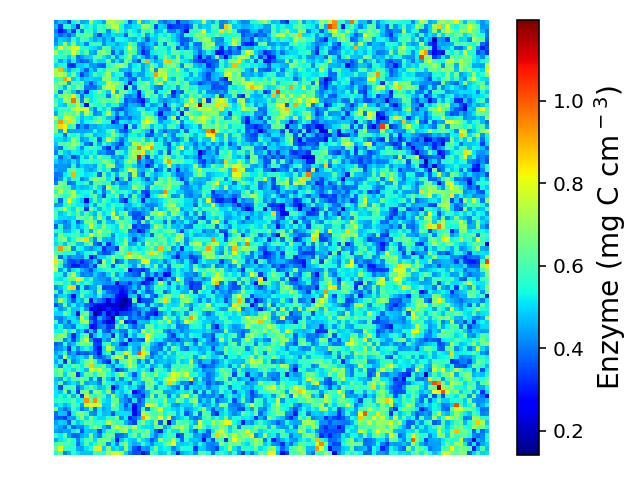

In [10]:
Enzyme = pd.read_csv('Enzyme_200.csv',index_col = 0)

Enzyme_Grid = np.zeros((10000,1))
for i in np.arange(1,10001,1):
    #Enzyme_Grid[i-1] = Enzyme.iloc[(0+12*(i-1)):(12+12*(i-1)),].sum()
    Enzyme_Grid[i-1]  = Enzyme.iloc[(Subindex + 12*(i-1)),]
        
        
df = pd.DataFrame(Enzyme_Grid)
df.columns = ['C']

Enzyme_c = df['C']
Enzyme_c_grid = Enzyme_c.copy().values.reshape(100,100)


plt.figure(figsize=(5, 4))
plt.grid(linestyle='')

xx = plt.imshow(Enzyme_c_grid,cmap='jet')
plt.axis('off')

cbar = plt.colorbar(xx,orientation='vertical')
cbar.set_label('Enzyme (mg C cm$^-$$^3$)',size=14)

#plt.savefig('Enzyme_Distribution_200.pdf',bbox_inches='tight')